In [4]:
import os
import mediapipe as mp 
import numpy as np
import cv2

## **1. Gesture Collection**

In [ ]:
# mp_holistic = mp.solutions.holistic # Holistic model
# mp_drawing = mp.solutions.drawing_utils # Drawing utilities

# mpHands = mp.solutions.hands
# hands = mpHands.Hands(max_num_hands=2, min_detection_confidence=0.7)

mp_holistic = mp.solutions.holistic
holistic = mp_holistic.Holistic(min_detection_confidence=0.7, min_tracking_confidence=0.7)
mpDraw = mp.solutions.drawing_utils

In [ ]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['Hello', 'Love You', 'Understand', 'Thanks', 'Some', 'Home', 'name', 'my', 'how'])
# actions = np.array(['name'])

# Thirty videos worth of data
no_sequences =  25

# Videos are going to be 30 frames in length
sequence_length = 30

# Folder start
start_folder = 0

In [ ]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

In [ ]:
cap = cv2.VideoCapture(0)
    
# NEW LOOP
# Loop through actions
for action in actions:
    # Loop through sequences aka videos
    for sequence in range(start_folder, start_folder+no_sequences):
        # Loop through video length aka sequence length
        for frame_num in range(sequence_length):

            _, frame = cap.read()

            x, y, c = frame.shape

            # Flip the frame vertically
            frame = cv2.flip(frame, 1)
            framergb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

            # Get hand landmark prediction
            result = holistic.process(framergb)  
            className = ''
            
            # post process the result
            if result.left_hand_landmarks or result.right_hand_landmarks:
                landmarks = []

                lh = [[res.x, res.y] for res in result.left_hand_landmarks.landmark] if result.left_hand_landmarks else np.zeros(21*2).reshape(-1,2).tolist()
                rh = [[res.x, res.y] for res in result.right_hand_landmarks.landmark] if result.right_hand_landmarks else np.zeros(21*2).reshape(-1,2).tolist()
                
                print("Initial: ", np.array(lh).shape, np.array(rh).shape)
                for i in range(len(lh)):
                    landmarks.append(np.append(lh[i], rh[i]).tolist())
                
                # Drawing landmarks on frames
                mpDraw.draw_landmarks(frame, result.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
                mpDraw.draw_landmarks(frame, result.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections


                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(frame, 'STARTING COLLECTION', (120,200), 
                            cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(frame, 'Frames for {} Video Number {}'.format(action, sequence), (15,15), 
                            cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 0, 0), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', frame)
                    cv2.waitKey(1000)
                else: 
                    cv2.putText(frame, 'Frames for {} Video Number {}'.format(action, sequence), (15,12), 
                            -cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', frame)
                
                
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                # npy_path = "./MP_Data/" + action + "_" + str(sequence) + "_" + str(frame_num)
                np.save(npy_path, landmarks)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                
cap.release()
cv2.destroyAllWindows()

In [ ]:
cap.release()
cv2.destroyAllWindows()

## **2. Alphabet Collection**

In [ ]:
mpHands = mp.solutions.hands
hands = mpHands.Hands(max_num_hands=1, min_detection_confidence=0.7)
mpDraw = mp.solutions.drawing_utils

In [5]:
DATA_PATH = os.path.join('MP_Data_Char') 

actions = np.array( [ chr(i) for i in range(ord('A'), ord('F')+1) ] )
print(actions)

no_sequences =  25
sequence_length = 30
start_folder = 0

['A' 'B' 'C' 'D' 'E' 'F']


In [ ]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

In [ ]:
cap = cv2.VideoCapture(0)
    
# NEW LOOP
# Loop through actions
for action in actions:
    # Loop through sequences aka videos
    for sequence in range(start_folder, start_folder+no_sequences):
        # Loop through video length aka sequence length
        for frame_num in range(sequence_length):

            _, frame = cap.read()

            x, y, c = frame.shape

            # Flip the frame vertically
            frame = cv2.flip(frame, 1)
            framergb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

            # Get hand landmark prediction
            result = hands.process(framergb)  
            className = ''
            
            # post process the result
            if result.multi_hand_landmarks:
                landmarks = []
                for handslms in result.multi_hand_landmarks:
                    for lm in handslms.landmark:
                        # print(id, lm)
                        lmx = int(lm.x * x)
                        lmy = int(lm.y * y)

                        landmarks.append([lmx, lmy])

                    # Drawing landmarks on frames
                    mpDraw.draw_landmarks(frame, handslms, mpHands.HAND_CONNECTIONS)


                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(frame, 'STARTING COLLECTION', (120,200), 
                            cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(frame, 'Frames for {} Video Number {}'.format(action, sequence), (15,15), 
                            cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 0, 0), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', frame)
                    cv2.waitKey(1000)
                else: 
                    cv2.putText(frame, 'Frames for {} Video Number {}'.format(action, sequence), (15,12), 
                            -cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', frame)
                
                
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                # npy_path = "./MP_Data/" + action + "_" + str(sequence) + "_" + str(frame_num)
                np.save(npy_path, landmarks)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                
cap.release()
cv2.destroyAllWindows()

In [ ]:
cap.release()
cv2.destroyAllWindows()

## **3. Pre-processing Code**

In [1]:
list_of_files = {}

# MP_Data for gestures, MP_Data_Char for Alphabets
for (dirpath, dirnames, filenames) in os.walk("MP_Data_Char"):
    # print(dirpath, "\n", dirnames, "\n", len(filenames))
    if(len(filenames)!=30):
         print(dirpath, "\n", len(filenames))

MP_Data_Char 
 0
MP_Data_Char\A 
 0
MP_Data_Char\A\11 
 29
MP_Data_Char\A\14 
 29
MP_Data_Char\A\16 
 29
MP_Data_Char\A\18 
 26
MP_Data_Char\A\19 
 29
MP_Data_Char\A\4 
 29
MP_Data_Char\A\6 
 29
MP_Data_Char\A\7 
 29
MP_Data_Char\B 
 0
MP_Data_Char\B\1 
 29
MP_Data_Char\B\15 
 29
MP_Data_Char\B\16 
 29
MP_Data_Char\B\22 
 29
MP_Data_Char\B\8 
 28
MP_Data_Char\C 
 0
MP_Data_Char\C\0 
 29
MP_Data_Char\C\19 
 26
MP_Data_Char\C\22 
 19
MP_Data_Char\C\3 
 29
MP_Data_Char\D 
 0
MP_Data_Char\D\15 
 29
MP_Data_Char\D\19 
 29
MP_Data_Char\D\20 
 29
MP_Data_Char\E 
 0
MP_Data_Char\E\10 
 29
MP_Data_Char\E\14 
 29
MP_Data_Char\E\17 
 29
MP_Data_Char\F 
 0
MP_Data_Char\F\15 
 29


In [6]:
label_map = {label:num for num, label in enumerate(actions)}
print(label_map)

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5}


In [8]:
data = []
labels = []

for action in actions:
    for (dirpath, dirnames, filenames) in os.walk(os.path.join("MP_Data_Char", action)):
        if(len(dirnames)==0):
            for filename in filenames:
                data.append(np.load( os.path.join(dirpath, filename) ))
                labels.append(label_map[action])

data = np.array(data)
labels = np.array(labels)
print(data.shape)
print(labels.shape)

(4459, 21, 2)
(4459,)


In [9]:
unique, counts = np.unique(labels, return_counts=True)
print(dict(zip(unique, counts)))

{0: 739, 1: 744, 2: 733, 3: 747, 4: 747, 5: 749}


In [10]:
# from tensorflow.keras.utils.np_utils import to_categorical
import tensorflow as tf

lab = tf.keras.utils.to_categorical(labels)
print(lab.shape)

(4459, 6)


In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, lab, test_size=0.2, random_state=42)

unique, counts = np.unique(np.argmax(y_train, axis=1), return_counts=True)
print(dict(zip(unique, counts)))

unique, counts = np.unique(np.argmax(y_test, axis=1), return_counts=True)
print(dict(zip(unique, counts)))

{0: 588, 1: 585, 2: 587, 3: 600, 4: 605, 5: 602}
{0: 151, 1: 159, 2: 146, 3: 147, 4: 142, 5: 147}


In [12]:
print("Training: ", X_train.shape, y_train.shape)
print("Test: ", X_test.shape, y_test.shape)

Training:  (3567, 21, 2) (3567, 6)
Test:  (892, 21, 2) (892, 6)


## **4. Model Training**

In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Flatten

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [18]:
model = Sequential([
    Flatten(input_shape=(21, X_train.shape[2])),
    Dense(64, activation='relu'),
    Dense(128, activation='relu'),
    Dense(512, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(y_train.shape[1], activation='softmax'),
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 42)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                2752      
_________________________________________________________________
dense_7 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_8 (Dense)              (None, 512)               66048     
_________________________________________________________________
dense_9 (Dense)              (None, 64)                32832     
_________________________________________________________________
dense_10 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_11 (Dense)             (None, 6)                

In [19]:
callback_checkpoint = ModelCheckpoint(
    './checkpoints/', monitor='val_loss', verbose=0, save_best_only=True,
    save_weights_only=True, mode='auto', save_freq='epoch',
)
callback_loss = EarlyStopping(monitor='loss', patience=4)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [20]:
history = model.fit(X_train, y_train, 
                    epochs=50, 
                    callbacks=[callback_checkpoint, callback_loss])

Epoch 1/50
112/112 [==============================] - 1s 3ms/step - loss: 4.3351 - accuracy: 0.5613
Epoch 2/50
112/112 [==============================] - 0s 3ms/step - loss: 0.2407 - accuracy: 0.9352
Epoch 3/50
112/112 [==============================] - 0s 3ms/step - loss: 0.1895 - accuracy: 0.9479
Epoch 4/50
112/112 [==============================] - 0s 3ms/step - loss: 0.2132 - accuracy: 0.9420
Epoch 5/50
112/112 [==============================] - 0s 3ms/step - loss: 0.0804 - accuracy: 0.9781
Epoch 6/50
112/112 [==============================] - 0s 3ms/step - loss: 0.1015 - accuracy: 0.9734
Epoch 7/50
112/112 [==============================] - 0s 3ms/step - loss: 0.1952 - accuracy: 0.9445
Epoch 8/50
112/112 [==============================] - 0s 3ms/step - loss: 0.1508 - accuracy: 0.9568
Epoch 9/50
112/112 [==============================] - 0s 2ms/step - loss: 0.0719 - accuracy: 0.9815
Epoch 10/50
112/112 [==============================] - 0s 2ms/step - loss: 0.0794 - accuracy: 0.9804

In [21]:
model.save("./checkpoints/alphabets_model")

INFO:tensorflow:Assets written to: ./checkpoints/alphabets_model\assets


## **5. Model Evaluation and Metrics**

In [22]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
y_pred = model.predict(X_test)
y_preds = np.argmax(y_pred, axis=1)

unique, counts = np.unique(y_preds, return_counts=True)
print(dict(zip(unique, counts)))

{0: 158, 1: 154, 2: 146, 3: 146, 4: 141, 5: 147}


In [24]:
def evaluate_model(history,X_test,y_test,model):
  """
    Input: 
      history - Model history variable
      X_test - Test features
      y_test - Target test variables
      model - Keras Model 

    Output:
      Accuracy Plot (Training + Validation)
      Loss Plot (Training + Validation)
      Confusion matrix
      Accuracy
      Classification Report 
  """  
  scores = model.evaluate((X_test),y_test, verbose=0)
  
  fig, axs = plt.subplots(1,3, figsize=(18,5))
  fig.tight_layout()

  axs[0].plot(history.history['accuracy'])
  axs[0].set_xlabel('Epoch')
  axs[0].set_ylabel('Accuracy')
  axs[0].set_title('Model - Accuracy')
  axs[0].legend(['Training'], loc='lower right')

  axs[1].plot(history.history['loss'])
  axs[1].set_xlabel('Epoch')
  axs[1].set_ylabel('Model Loss')
  axs[1].set_title('Model - Loss')
  axs[1].legend(['Training'], loc='upper right')

  target_names=actions
  
  y_true=[]
  for element in y_test:
      y_true.append(np.argmax(element))
  prediction_proba = model.predict(X_test)
  prediction = np.argmax(prediction_proba,axis=1)
  cnf_matrix = confusion_matrix(y_true, prediction)    
  g = sns.heatmap(cnf_matrix, annot=True, cmap='Blues', fmt='g', ax=axs[2],
                  xticklabels=target_names, yticklabels=target_names)
  plt.show()

  print("\nAccuracy: %.2f%% \n" % (scores[1]*100))
  print(classification_report(y_true, prediction, target_names=target_names))

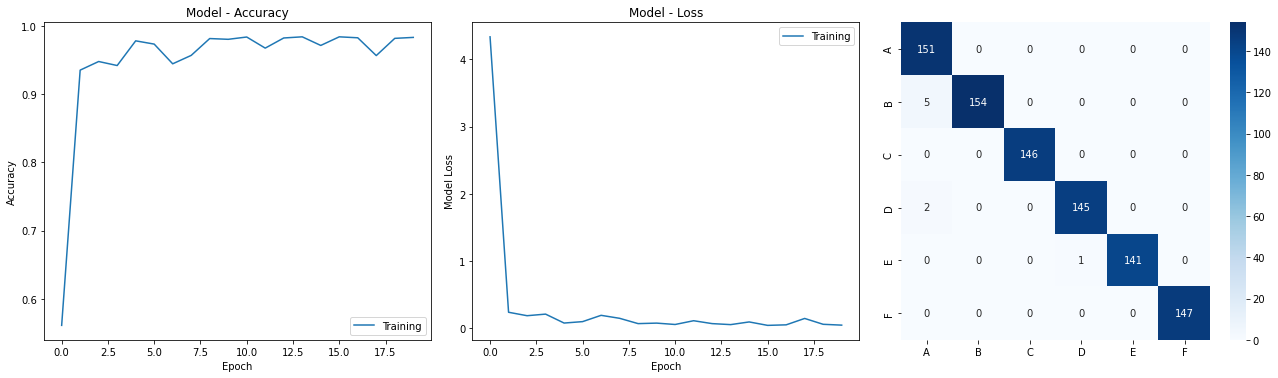


Accuracy: 99.10% 

              precision    recall  f1-score   support

           A       0.96      1.00      0.98       151
           B       1.00      0.97      0.98       159
           C       1.00      1.00      1.00       146
           D       0.99      0.99      0.99       147
           E       1.00      0.99      1.00       142
           F       1.00      1.00      1.00       147

    accuracy                           0.99       892
   macro avg       0.99      0.99      0.99       892
weighted avg       0.99      0.99      0.99       892



In [25]:
evaluate_model(history, X_test, y_test, model)

## **6. Live testing**

### **a. Gestures**

In [ ]:
import cv2
import numpy as np
import mediapipe as mp
import tensorflow as tf
from tensorflow.keras.models import load_model

# initialize mediapipe
mp_holistic = mp.solutions.holistic
holistic = mp_holistic.Holistic(min_detection_confidence=0.7, min_tracking_confidence=0.7)
mpDraw = mp.solutions.drawing_utils

# Load the gesture recognizer model
model = load_model('checkpoints\\two_hand_9_model')

# Load class names
# f = open('gesture.names', 'r')
# classNames = f.read().split('\n')
# f.close()
classNames = actions
print(classNames)


# Initialize the webcam
cap = cv2.VideoCapture(0)

while True:
    # Read each frame from the webcam
    _, frame = cap.read()

    x, y, c = frame.shape

    # Flip the frame vertically
    frame = cv2.flip(frame, 1)
    framergb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Get hand landmark prediction
    result = holistic.process(framergb)     
    className = ''

    # post process the result
    if result.left_hand_landmarks or result.right_hand_landmarks:
        landmarks = []

        lh = [[res.x, res.y] for res in result.left_hand_landmarks.landmark] if result.left_hand_landmarks else np.zeros(21*2).reshape(-1,2).tolist()
        rh = [[res.x, res.y] for res in result.right_hand_landmarks.landmark] if result.right_hand_landmarks else np.zeros(21*2).reshape(-1,2).tolist()
        
        # print("Initial: ", np.array(lh).shape, np.array(rh).shape)
        for i in range(len(lh)):
            landmarks.append(np.append(lh[i], rh[i]).tolist())
        
        # Drawing landmarks on frames
        mpDraw.draw_landmarks(frame, result.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
        mpDraw.draw_landmarks(frame, result.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections


        # Predict gesture
        prediction = model.predict([landmarks])
        # print(prediction)
        classID = np.argmax(prediction)
        className = classNames[classID]

    # show the prediction on the frame
    cv2.putText(frame, className, (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 
                   1, (0,0,255), 2, cv2.LINE_AA)

    # Show the final output
    cv2.imshow("Output", frame) 

    if cv2.waitKey(1) == ord('q'):
        break

# release the webcam and destroy all active windows
cap.release()

cv2.destroyAllWindows()

### **b. Alphabets**

In [27]:
import cv2
import numpy as np
import mediapipe as mp
import tensorflow as tf
from tensorflow.keras.models import load_model

# initialize mediapipe
mpHands = mp.solutions.hands
hands = mpHands.Hands(max_num_hands=1, min_detection_confidence=0.7)
mpDraw = mp.solutions.drawing_utils

# Load the gesture recognizer model
model = load_model('checkpoints\\alphabets_model')

# Load class names
classNames = actions
print(classNames)


# Initialize the webcam
cap = cv2.VideoCapture(0)

while True:
    # Read each frame from the webcam
    _, frame = cap.read()

    x, y, c = frame.shape

    # Flip the frame vertically
    frame = cv2.flip(frame, 1)
    framergb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Get hand landmark prediction
    result = hands.process(framergb)

    # print(result)
    
    className = ''

    # post process the result
    if result.multi_hand_landmarks:
        landmarks = []
        for handslms in result.multi_hand_landmarks:
            for lm in handslms.landmark:
                # print(id, lm)
                lmx = int(lm.x * x)
                lmy = int(lm.y * y)

                landmarks.append([lmx, lmy])

            # Drawing landmarks on frames
            mpDraw.draw_landmarks(frame, handslms, mpHands.HAND_CONNECTIONS)

            # Predict gesture
            prediction = model.predict([landmarks])
            # print(prediction)
            classID = np.argmax(prediction)
            className = classNames[classID]

    # show the prediction on the frame
    cv2.putText(frame, className, (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 
                   1, (0,0,255), 2, cv2.LINE_AA)

    # Show the final output
    cv2.imshow("Output", frame) 

    if cv2.waitKey(1) == ord('q'):
        break

# release the webcam and destroy all active windows
cap.release()

cv2.destroyAllWindows()

['A' 'B' 'C' 'D' 'E' 'F']
